pip install geopandas

In [411]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [601]:
pip install plotly

     |████████████████████████████████| 26.5 MB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


This time series analysis hopes to find a coorelation between accident location, type of issue, time taken to resolve issue, time of day, day of week, and month of year. This will help predict when and where an accident is likely to happen.

# Import necessary libraries

In [602]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline


# Data Collection/Organization

In [603]:
file = 'Data/traffic_data_cleaned.csv'


In [604]:
df = pd.read_csv(file)
df.head()


,short_ID,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min
0,C16,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667
1,6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000
2,2A7,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000
3,89D,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333
4,E7F,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000


In [605]:
df.shape

(225445, 11)

There are 249,650 rows and 9 columns

In [606]:
df.describe()

,Latitude,Longitude,published_day,timespan_sec,timespan_min
count,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000
mean,30.301440,-97.733156,2.906261,2979.937018,49.665617
std,0.094080,0.087511,1.935056,2381.053573,39.684226
min,30.003883,-98.226709,0.000000,20.000000,0.333333
25%,30.231715,-97.777183,1.000000,1170.000000,19.500000
50%,30.293602,-97.734450,3.000000,2250.000000,37.500000
75%,30.373691,-97.686922,5.000000,4111.000000,68.516667
max,30.798642,-97.293320,6.000000,12000.000000,200.000000


# Exploratory Data Analysis

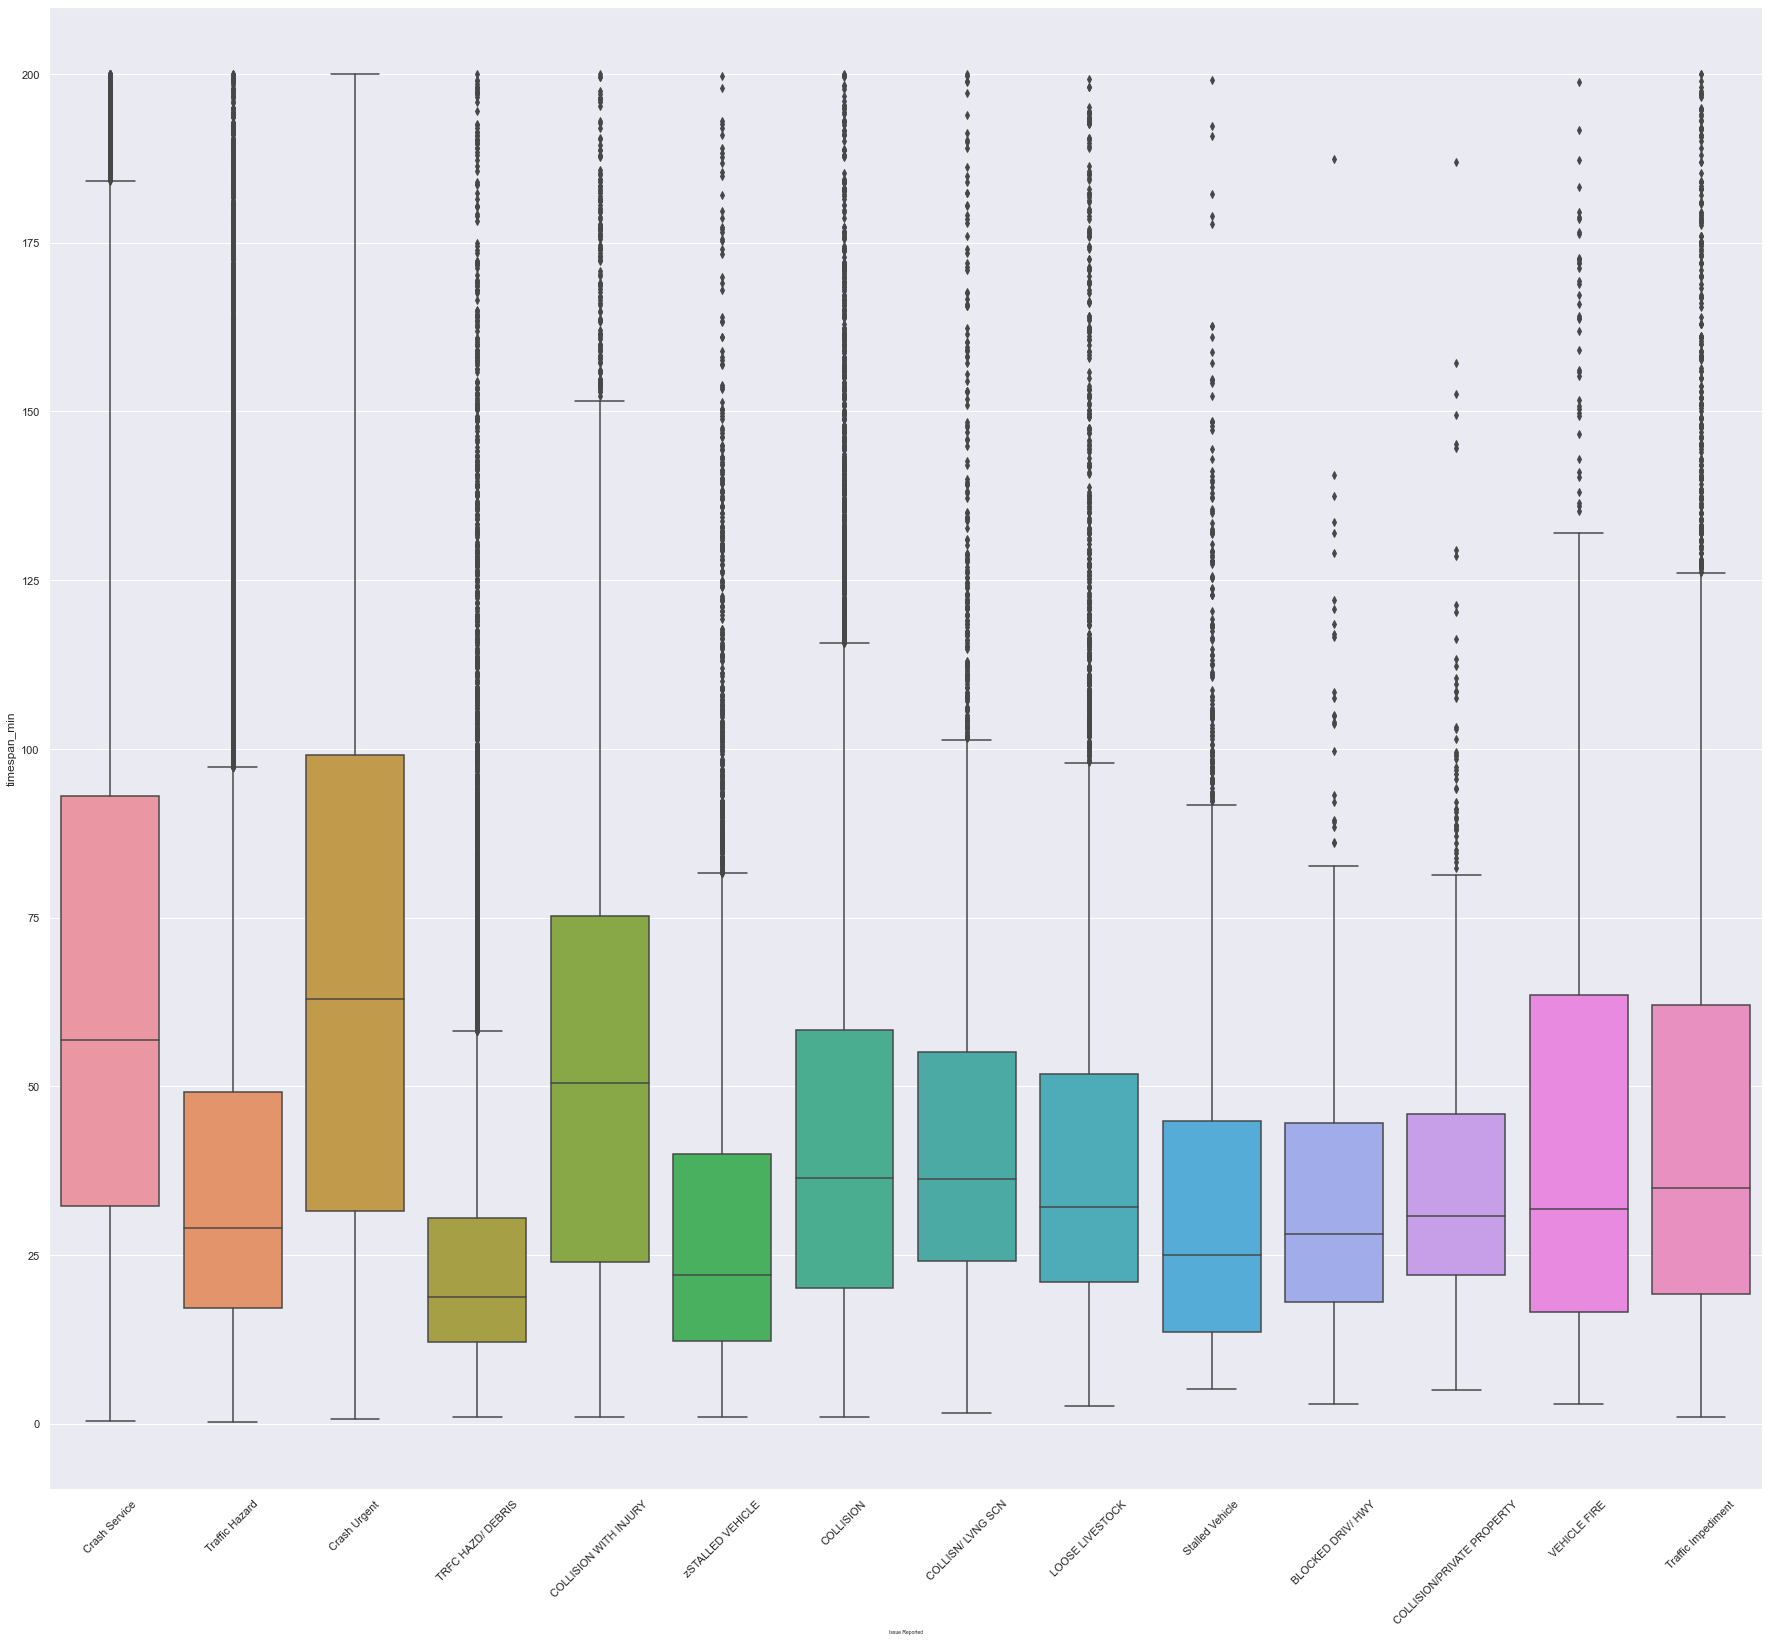

In [614]:

ax = sns.boxplot(x= 'issue_reported', y='timespan_min', data=df)
ax.set_xlabel('Issue Reported', fontsize=5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.set(rc={'figure.figsize':(30.7,27.27)})




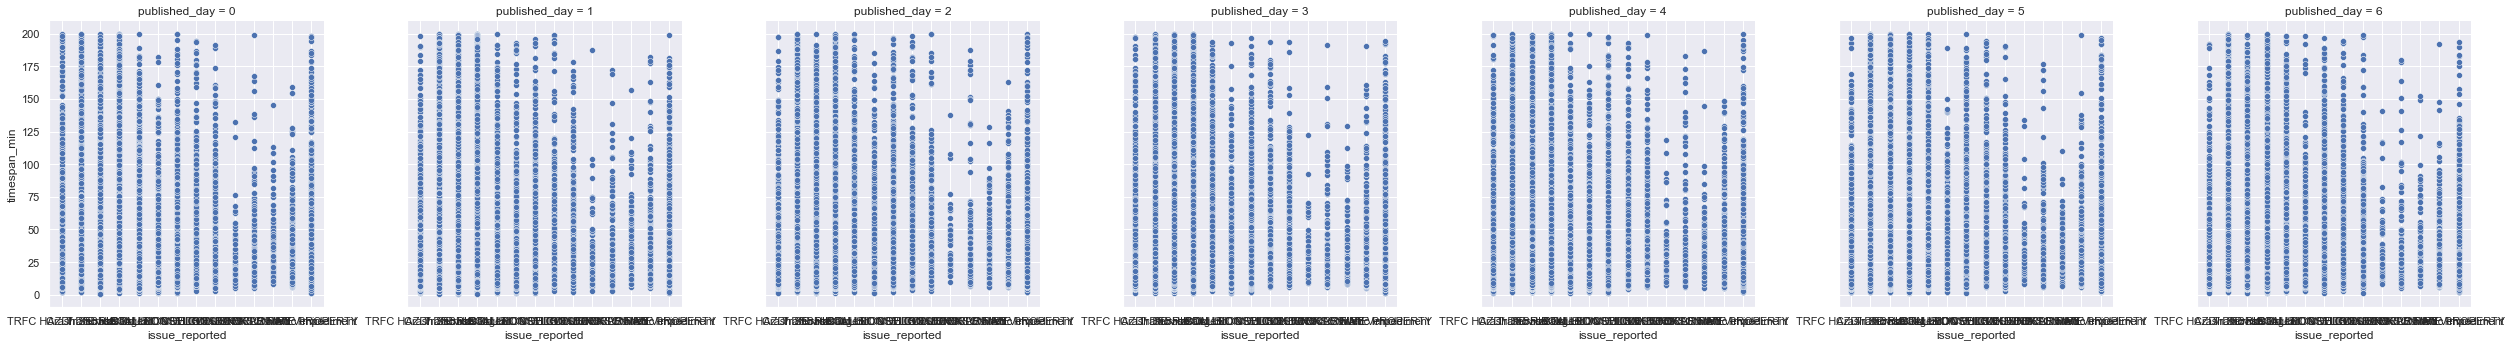

In [608]:
ax = sns.relplot(x= 'issue_reported', y='timespan_min', data=df, kind='scatter', col='published_day')
plt.show()

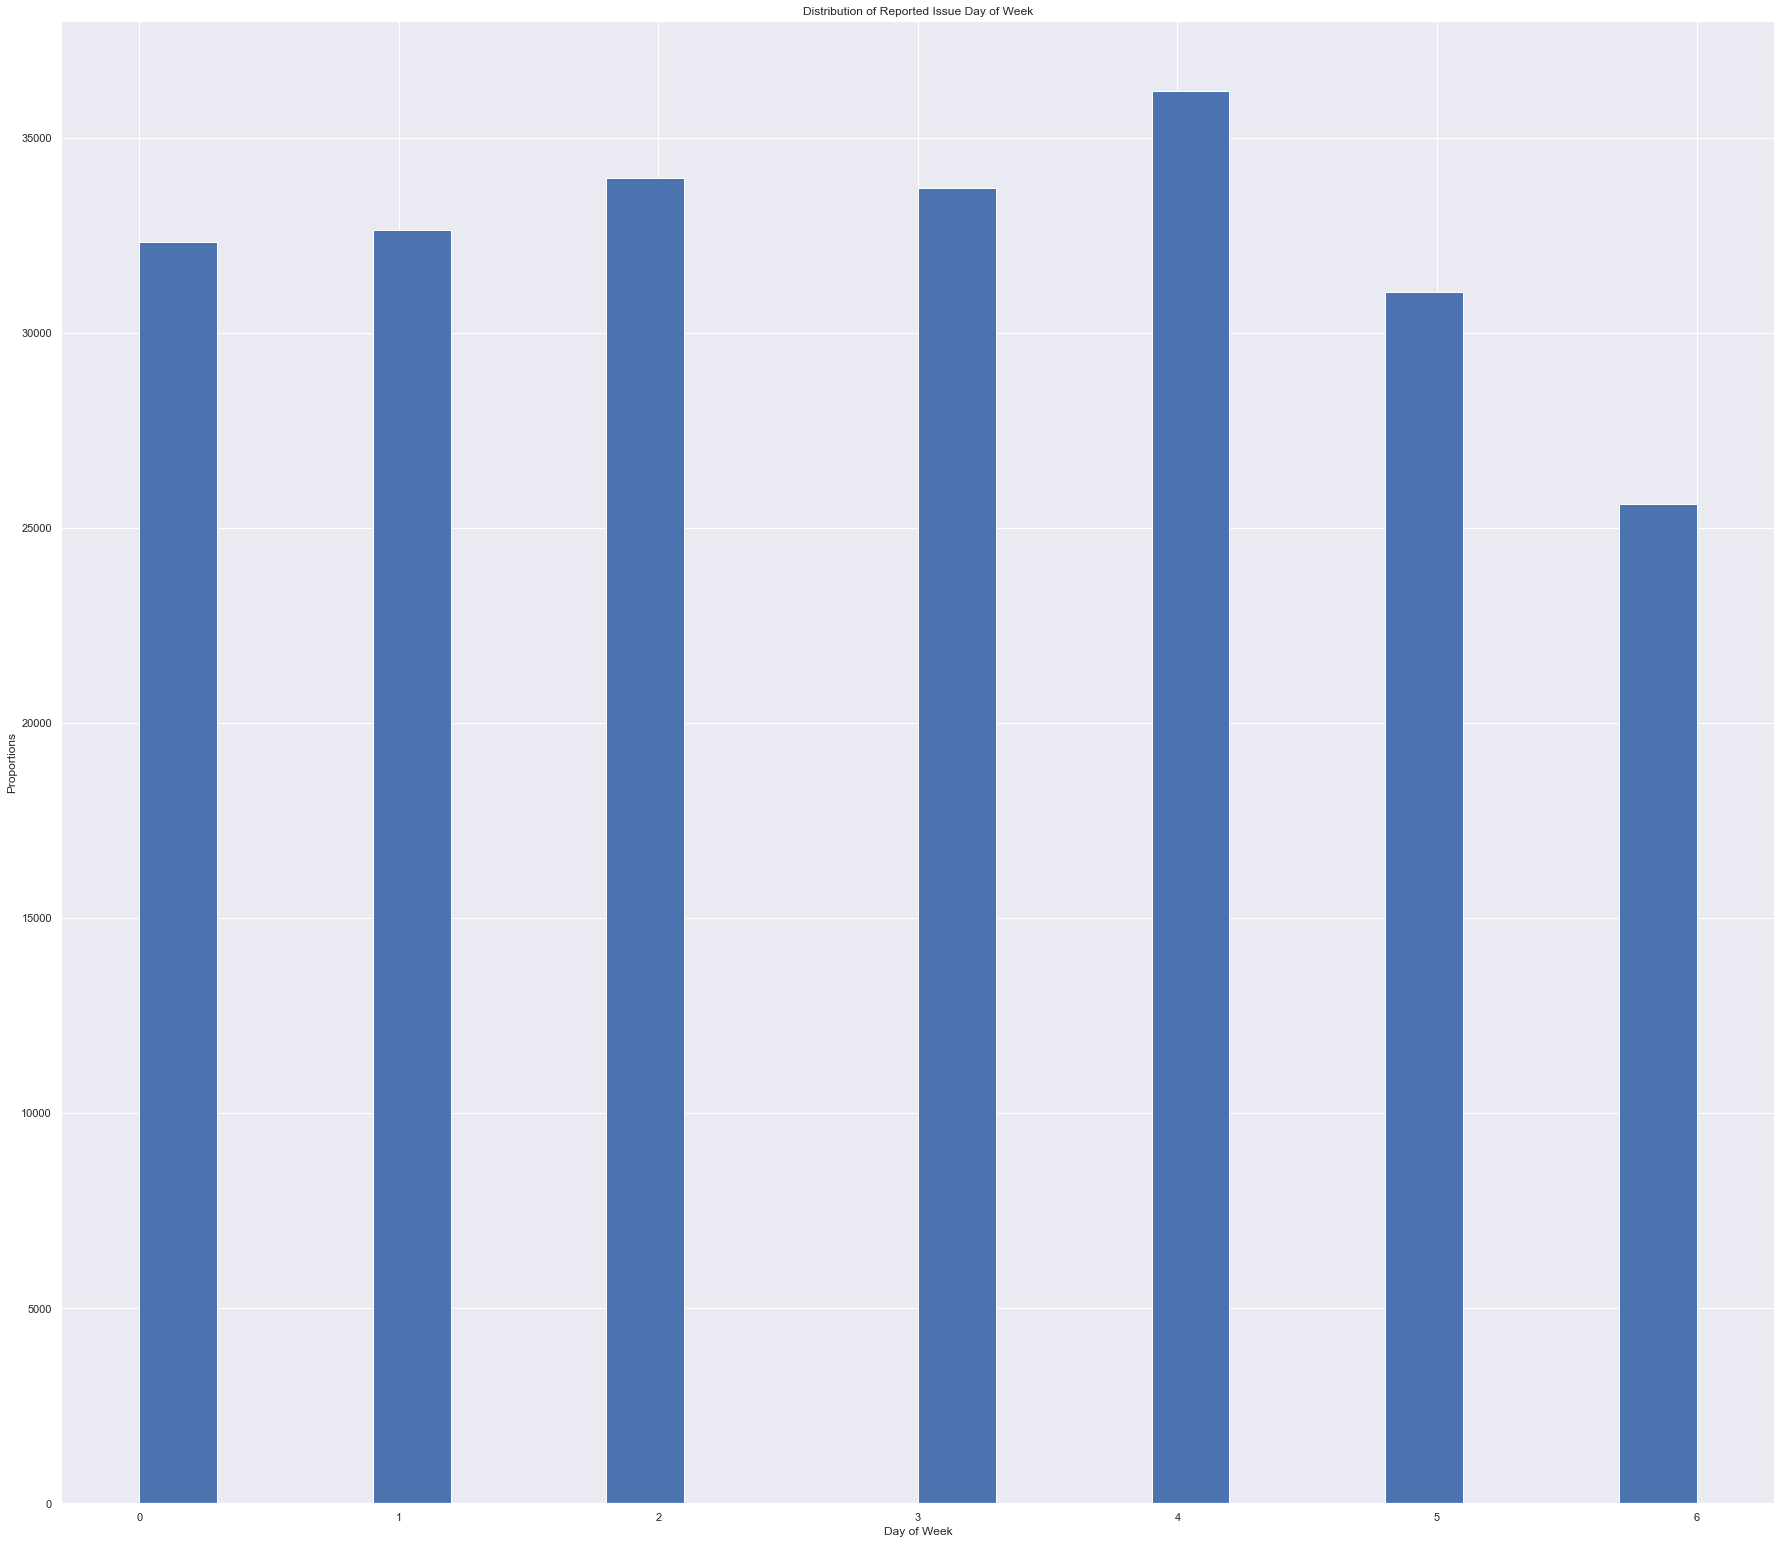

In [609]:
df.published_day.hist(bins=20)
plt.xlabel('Day of Week')
plt.ylabel('Proportions')
plt.title('Distribution of Reported Issue Day of Week');

##Plot Key 
- 0 = Monday  
- 1 = Tuesday
- 2 = Wednesday
- 3 = Thursday
- 4 = Friday
- 5 = Saturday
- 6 = Sunday


We can see that the highest instances of traffic incidents happen of Friday, which is to be expected due to a lively nightlife. Conversely, Sunday has the least amount of incidents as most people are resting and preparing for the work week.

Monday and Tuesday hold steady at around 35,0000
Wednesday and Thursday there is a slight increase to around 37,000
Saturday has less instances than weekdays at about 33,000

The next thing I need to do is take latitude and logitude and put them in a scatter plot over a map.

In [610]:
crs = {'init': 'epsg:4326'}

In [611]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

In [612]:
geo_df = gpd.GeoDataFrame(df,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,short_ID,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min,geometry
0,C16,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667,POINT (-97.74191 30.28380)
1,6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000,POINT (-97.70096 30.33959)
2,2A7,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000,POINT (-97.63810 30.32945)
3,89D,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333,POINT (-97.76070 30.20281)
4,E7F,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000,POINT (-97.68734 30.18426)


import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoidG9tc2hpZWxkczcxIiwiYSI6ImNreXl0anNxajBjaXQybnJtdW5zeXdqb3UifQ.6vXBOrDTeliFVziQaB6ecg')
gpd['size']=65
#mapbox tokens found here https://account.mapbox.com/access-tokens
fig = px,scatter_mapbox(gdf, lat = gpd.geometry.y, lon=gpd.geometry.x, cmapbox_style='outdoors', size='size', zoom=10)
fig.show()

fig,ax =plt.subplots(figsize=(15,15))
street_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['WnvPresent'] ==0].plot(ax = ax, markersize = 20, color = 'blue',marker = '=o', label = 'Neg')
geo_df[geo_df['WnvPresent'] ==1].plot(ax = ax, markersize = 20, color = 'red',marker = '^', label = 'Pos')
plt.legend(prop={'size': 15})

In [ ]:
#spots = pd.DataFrame(df['Latitude','Longitude'])
#gdf = gpd.GeoDataFrame(df, geometry=gpd.df_from_xy(df.Latitude, df.Longitude))
#gdf